### LITTLE EYES V2
#### Meu Segundo Modelo de Visão Computacional

In [23]:
the_seed = 32
digit_size = (300, 300, 1)
convnn_acivation = 'relu'
fully_connected_acivation = 'tanh'
hyperparameter_max = 10
learning_rate = 0.001
max_epochs = 5
score_metric = 'accuracy'
verbose = 1
phi = 360

dir_images = "C:\\AT\\images"
path_model = "D:\\AT\\model\\handrecognition_model.h5"
image_size = (300,300)
input_shape = image_size + (1,)
validation_split = 0.20
the_seed = 1

In [24]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers, Input, Model
from matplotlib import pyplot
import numpy
import pandas
import random

In [25]:
random.seed(the_seed)
numpy.random.seed(the_seed)
seed = numpy.random.randint(the_seed)
tf.random.set_seed(the_seed)

In [26]:
def create_rps(input_size : tuple[int, int, int] = (300, 300, 1),
                      convnn_acivation : str = 'relu',
                      fully_connected_acivation : str = 'tanh',
                      net_name : str = 'LittleEyes',
                      hyperparameter : int = 1,
                      phi = phi):
    
    filter_size = (2,2)
    pooling_size = (2,2)
    
    # CAMADA OCULTA
    inputs = tf.keras.Input(shape=input_size)
    
    # RESCALING
    scale_layer = tf.keras.layers.Rescaling(scale=1 / 127.5, offset=-1)
    x = scale_layer(inputs)
    
    # CAMADA DE AUMENTO DE DADOS
    rotator = tf.keras.layers.RandomRotation(phi)
    x = rotator(x)

    # PRIMEIRA CAMADA CONVOLUCIONAL
    conv_2d_layer_1 = tf.keras.layers.Conv2D(2 * hyperparameter, filter_size, activation = convnn_acivation)
    x = conv_2d_layer_1(inputs)

    # PRIMEIRA CAMADA MAX POOLING
    maxpool_1 = tf.keras.layers.MaxPooling2D(pooling_size)
    x = maxpool_1(x)

    # SEGUNDA CAMADA CONVOLUCIONAL
    conv_2d_layer_2 = tf.keras.layers.Conv2D(4 * hyperparameter, filter_size, activation = convnn_acivation)
    x = conv_2d_layer_2(x)
    

    # SEGUNDA CAMADA MAX POOLING
    maxpool_2 = tf.keras.layers.MaxPooling2D(pooling_size)
    x = maxpool_2(x)

    # TERCEIRA CAMADA CONVOLUCIONAL
    conv_2d_layer_3 = tf.keras.layers.Conv2D(4 * hyperparameter, filter_size, activation = convnn_acivation)
    x = conv_2d_layer_3(x)

    # TERCEIRA CAMADA MAX POOLING
    maxpool_3 = tf.keras.layers.MaxPooling2D(pooling_size)
    x = maxpool_3(x)

    # FLATTEN
    flatten_layer = tf.keras.layers.Flatten()
    x = flatten_layer(x)

    # FULLY CONNECTED HIDDEN LAYER
    hidden_layer = tf.keras.layers.Dense(hyperparameter + 1, activation = fully_connected_acivation)
    x = hidden_layer(x)

    # OUTPUT LAYER
    output_layer = tf.keras.layers.Dense(3)
    outputs = output_layer(x)

    return tf.keras.Model(inputs = inputs, outputs = outputs, name = net_name)

In [27]:
(train_ds, validation_ds) = tf.keras.utils.image_dataset_from_directory(
    directory=dir_images,
    labels='inferred',
    label_mode='int',
    color_mode='grayscale',
    image_size=image_size,
    seed=seed,
    validation_split=validation_split,
    subset='both',
    interpolation='bilinear',
    crop_to_aspect_ratio=False
)

Found 5113 files belonging to 3 classes.
Using 4091 files for training.
Using 1022 files for validation.


In [28]:
result_list = []

for hyperparameter in numpy.arange(1, hyperparameter_max + 1):
    net_name = f"LittleEyes_{hyperparameter}"
    print(f"{net_name} training started...")
    
    little_eyes = create_rps(net_name = net_name, 
                                    hyperparameter = hyperparameter, phi = phi)
    
    opt = optimizers.Adam(learning_rate = learning_rate)
    
    little_eyes.compile(optimizer=opt ,
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=[score_metric])

    history = little_eyes.fit(train_ds, epochs = max_epochs, 
                        validation_data=validation_ds, verbose = verbose)
    
    training_score = history.history[score_metric][-1]
    validation_score = history.history[f"val_{score_metric}"][-1]
    
    result_list.append((net_name, hyperparameter, training_score, validation_score, little_eyes))
    print(f"{net_name.upper()}: {100 * training_score:.0f}% TRAINING {score_metric.upper()} / {100 * validation_score:.0f}% VALIDATION {score_metric.upper()}")

LittleEyes_1 training started...
Epoch 1/5
128/128 [==============================] - 44s 337ms/step - loss: 1.2429 - accuracy: 0.3278 - val_loss: 1.1596 - val_accuracy: 0.3425
Epoch 2/5
128/128 [==============================] - 47s 363ms/step - loss: 1.1363 - accuracy: 0.3302 - val_loss: 1.1102 - val_accuracy: 0.3425
Epoch 3/5
128/128 [==============================] - 47s 365ms/step - loss: 1.1065 - accuracy: 0.3302 - val_loss: 1.0996 - val_accuracy: 0.3425
Epoch 4/5
128/128 [==============================] - 46s 358ms/step - loss: 1.1000 - accuracy: 0.3302 - val_loss: 1.0984 - val_accuracy: 0.3425
Epoch 5/5
128/128 [==============================] - 53s 413ms/step - loss: 1.0989 - accuracy: 0.3249 - val_loss: 1.0985 - val_accuracy: 0.3425
LITTLEEYES_1: 32% TRAINING ACCURACY / 34% VALIDATION ACCURACY
LittleEyes_2 training started...
Epoch 1/5
128/128 [==============================] - 52s 397ms/step - loss: 1.2954 - accuracy: 0.3339 - val_loss: 1.2171 - val_accuracy: 0.3425
Epoch 2/

KeyboardInterrupt: 

In [ ]:
results = pandas.DataFrame.from_records(result_list)
results.columns = ["net_name", 'hyperparameter', score_metric, f"val_{score_metric}", "little_eyes"]
results.sort_values("val_accuracy", ascending = False)

,net_name,accuracy,val_accuracy,hyperparameter
0,LittleEyes_1,0.657567,0.6466,1
1,LittleEyes_2,0.899817,0.9046,2
2,LittleEyes_3,0.935450,0.9389,3
3,LittleEyes_4,0.953400,0.9415,4
4,LittleEyes_5,0.929883,0.9193,5


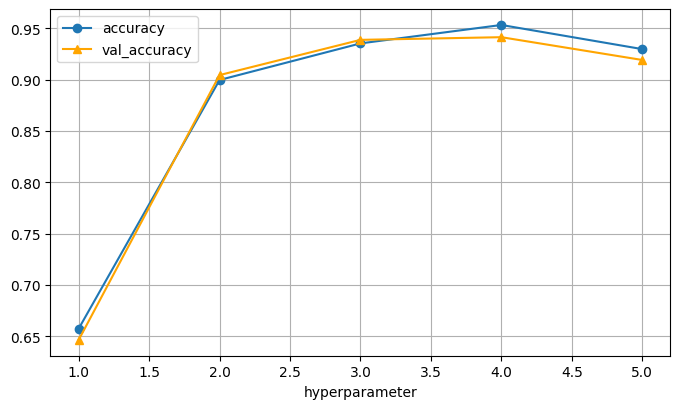

In [ ]:
fig = pyplot.figure(figsize = (8, 4.5))
ax = fig.add_subplot(111)
results.plot(x = 'hyperparameter', y = 'accuracy', marker = 'o', ax = ax)
results.plot(x = 'hyperparameter', y = 'val_accuracy', marker = '^', color = 'orange', ax = ax)
ax.grid()